1. LOADING THE DATASET

In [ ]:
import pandas as pd

data = pd.read_csv('Clustering Data.csv')

print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has 15144 rows and 90 columns


In [26]:
data.head()

,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,...,0,0,0,0,1,0,0,0,0,1


2. DATA PRE-PROCESSING

In [28]:
#2.1 Missing Values
missing_values = data.isnull().sum()
missing_values

uid                          0
PNRLocatorID                 0
avg_amt                      0
round_trip                   0
group_size                   0
                            ..
UflyMemberStatus_Standard    0
seasonality_Q1               0
seasonality_Q2               0
seasonality_Q3               0
seasonality_Q4               0
Length: 90, dtype: int64

In [29]:
#2.2 Preserving the Original Data

data_dropped = data.drop(columns=['uid','PNRLocatorID'])

clustering_data = data_dropped.copy()

clustering_data.head(10)

,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,BookingChannel_SCA_Website_Booking,BookingChannel_SY_Vacation,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,0.019524,0,0.000,0,0.029703,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.081774,1,0.000,0,0.039604,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0.026650,0,0.125,1,0.069307,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0.026650,0,0.125,1,0.069307,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0.000000,1,0.000,0,0.035361,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,0.000000,1,0.125,1,0.050919,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
6,0.000000,1,0.125,1,0.050919,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7,0.074727,1,0.000,0,0.045262,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
8,0.035414,1,0.000,0,0.082037,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9,0.035414,1,0.125,1,0.018388,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


3. CLUSTERING

Iteration number: 1
Iteration number: 2
Iteration number: 3
Iteration number: 4
Iteration number: 5
Iteration number: 6
Iteration number: 7
Iteration number: 8
Iteration number: 9
Iteration number: 10
Iteration number: 11
Iteration number: 12
Iteration number: 13
Iteration number: 14
Iteration number: 15
Iteration number: 16
Iteration number: 17
Iteration number: 18
Iteration number: 19
Iteration number: 20


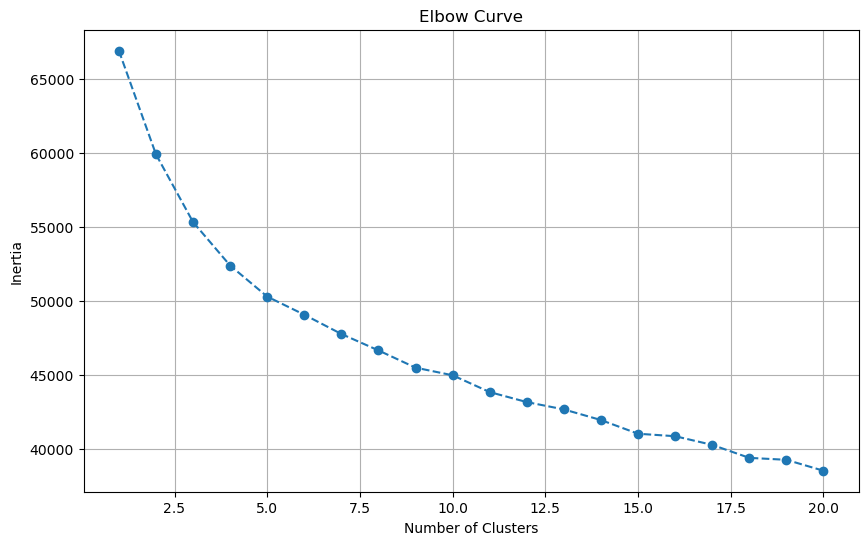

In [31]:
#3.1 Optimum Number of Clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
cluster_range = range(1,21)

for cluster_num in cluster_range: 
    print(f'Iteration number: {cluster_num}')

    kmeans = KMeans(n_clusters = cluster_num, n_init = 10)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [32]:
#3.2 Apply K-Means

kmeans = KMeans(n_clusters = 5, n_init=30)
kmeans.fit(clustering_data)

data['Cluster'] = kmeans.labels_

data.head(10000)

,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4,Cluster
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,...,0,0,0,0,1,0,0,0,1,3
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,...,0,0,0,0,1,0,0,1,0,3
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,1,0,1,0,0,0,4
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,1,0,1,0,0,0,4
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,465241484D44696420493F7C2067657420746869732072...,OVDEVE,0.042032,0,0.125,1,0.036775,0,0,0,...,0,0,0,0,1,0,0,1,0,3
9996,5649434B45525944696420493F7C206765742074686973...,OVDVCT,0.049705,0,0.000,0,0.028289,0,1,0,...,0,0,0,1,0,0,0,1,0,0
9997,535445504B4144696420493F7C20676574207468697320...,OVGARJ,0.012305,1,0.000,0,0.019802,0,1,0,...,0,0,0,1,0,0,0,1,0,2
9998,4B4F53544B4F44696420493F7C20676574207468697320...,OVGBHE,0.067609,1,0.125,1,0.125884,0,1,0,...,0,0,0,1,0,0,0,1,0,2


In [33]:
print(data.columns)

Index(['uid', 'PNRLocatorID', 'avg_amt', 'round_trip', 'group_size', 'group',
       'days_pre_booked', 'BookingChannel_Other',
       'BookingChannel_Outside_Booking', 'BookingChannel_Reservations_Booking',
       'BookingChannel_SCA_Website_Booking', 'BookingChannel_SY_Vacation',
       'BookingChannel_Tour_Operator_Portal', 'age_group_0-17',
       'age_group_18-24', 'age_group_25-34', 'age_group_35-54',
       'age_group_55+', 'true_origins_ori_ANC', 'true_origins_ori_BOS',
       'true_origins_ori_CUN', 'true_origins_ori_CZM', 'true_origins_ori_DCA',
       'true_origins_ori_DFW', 'true_origins_ori_HRL', 'true_origins_ori_IFP',
       'true_origins_ori_JFK', 'true_origins_ori_LAN', 'true_origins_ori_LAS',
       'true_origins_ori_LAX', 'true_origins_ori_MCO', 'true_origins_ori_MDW',
       'true_origins_ori_MIA', 'true_origins_ori_MSP', 'true_origins_ori_PHX',
       'true_origins_ori_PSP', 'true_origins_ori_PUJ', 'true_origins_ori_PVR',
       'true_origins_ori_RSW', 'true_origin

In [34]:
data['Cluster'].value_counts()

Cluster
1    4126
2    3838
0    2441
3    2386
4    2353
Name: count, dtype: int64

In [35]:
# sort_index()

cluster_sizes = data['Cluster']. value_counts().sort_index()
cluster_sizes

Cluster
0    2441
1    4126
2    3838
3    2386
4    2353
Name: count, dtype: int64

In [ ]:
#LOAD CUSTOMER DATA DATASET

customer_data = pd.read_csv('sample_data_transformed.csv')
print(f'The dataset has {customer_data.shape[0]} rows and {customer_data.shape[1]} columns')

In [37]:
customer_data.head(10)

,Unnamed: 0,PNRLocatorID,PaxName,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,EncryptedName,...,uid,age_group,true_origins,final_destination,round_trip,group_size,group,seasonality,days_pre_booked,true_destination
0,1,AADMLF,PETEJO,3.377490e+12,1,MSP,DFW,9/15/14,10/6/14,504554455244696420493F7C2067657420746869732072...,...,504554455244696420493F7C2067657420746869732072...,55+,MSP,DFW,0,1,0,Q4,21,DFW
1,2,AAFBOM,FIXSMO,3.372110e+12,2,JFK,MSP,7/22/14,8/19/14,46495853454E44696420493F7C20676574207468697320...,...,46495853454E44696420493F7C20676574207468697320...,35-54,MSP,MSP,1,1,0,Q3,28,JFK
2,3,AAFBOM,FIXSMO,3.372110e+12,1,MSP,JFK,7/22/14,8/14/14,46495853454E44696420493F7C20676574207468697320...,...,46495853454E44696420493F7C20676574207468697320...,35-54,MSP,MSP,1,1,0,Q3,23,JFK
3,4,AAFILI,SCUTKA,3.372110e+12,2,MSP,SEA,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,...,534355545444696420493F7C2067657420746869732072...,25-34,LAN,SEA,0,2,1,Q1,49,MSP
4,5,AAFILI,SCUTKA,3.372110e+12,1,LAN,MSP,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,...,534355545444696420493F7C2067657420746869732072...,25-34,LAN,SEA,0,2,1,Q1,49,MSP
5,6,AAFILI,SCUTTE,3.372110e+12,2,MSP,SEA,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,...,534355545444696420493F7C2067657420746869732072...,0-17,LAN,SEA,0,2,1,Q1,49,MSP
6,7,AAFILI,SCUTTE,3.372110e+12,1,LAN,MSP,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,...,534355545444696420493F7C2067657420746869732072...,0-17,LAN,SEA,0,2,1,Q1,49,MSP
7,8,AAFRQI,DUMMJO,3.377350e+12,2,MSP,DFW,11/7/13,12/2/13,44554D4D414E4E44696420493F7C206765742074686973...,...,44554D4D414E4E44696420493F7C206765742074686973...,18-24,DFW,DFW,1,1,0,Q4,25,MSP
8,9,AAFRQI,DUMMJO,3.377350e+12,1,DFW,MSP,11/7/13,11/28/13,44554D4D414E4E44696420493F7C206765742074686973...,...,44554D4D414E4E44696420493F7C206765742074686973...,18-24,DFW,DFW,1,1,0,Q4,21,MSP
9,10,AAIARF,LARSST,3.377170e+12,1,MSP,LAX,2/5/13,3/10/13,4C4152534F4E44696420493F7C20676574207468697320...,...,4C4152534F4E44696420493F7C20676574207468697320...,35-54,MSP,MSP,1,2,1,Q1,33,LAX


In [38]:
#MERGE THE TWO DATASETS

final_dataframe = customer_data.merge(data[['uid', 'Cluster']], on='uid', how='left')

In [65]:
final_dataframe.head(10)

,Unnamed: 0,PNRLocatorID,PaxName,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,EncryptedName,...,age_group,true_origins,final_destination,round_trip,group_size,group,seasonality,days_pre_booked,true_destination,Cluster
0,1,AADMLF,PETEJO,3.377490e+12,1,MSP,DFW,9/15/14,10/6/14,504554455244696420493F7C2067657420746869732072...,...,55+,MSP,DFW,0,1,0,Q4,21,DFW,3
1,2,AAFBOM,FIXSMO,3.372110e+12,2,JFK,MSP,7/22/14,8/19/14,46495853454E44696420493F7C20676574207468697320...,...,35-54,MSP,MSP,1,1,0,Q3,28,JFK,3
2,3,AAFBOM,FIXSMO,3.372110e+12,1,MSP,JFK,7/22/14,8/14/14,46495853454E44696420493F7C20676574207468697320...,...,35-54,MSP,MSP,1,1,0,Q3,23,JFK,3
3,4,AAFILI,SCUTKA,3.372110e+12,2,MSP,SEA,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,...,25-34,LAN,SEA,0,2,1,Q1,49,MSP,4
4,5,AAFILI,SCUTKA,3.372110e+12,1,LAN,MSP,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,...,25-34,LAN,SEA,0,2,1,Q1,49,MSP,4
5,6,AAFILI,SCUTTE,3.372110e+12,2,MSP,SEA,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,...,0-17,LAN,SEA,0,2,1,Q1,49,MSP,4
6,7,AAFILI,SCUTTE,3.372110e+12,1,LAN,MSP,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,...,0-17,LAN,SEA,0,2,1,Q1,49,MSP,4
7,8,AAFRQI,DUMMJO,3.377350e+12,2,MSP,DFW,11/7/13,12/2/13,44554D4D414E4E44696420493F7C206765742074686973...,...,18-24,DFW,DFW,1,1,0,Q4,25,MSP,0
8,9,AAFRQI,DUMMJO,3.377350e+12,1,DFW,MSP,11/7/13,11/28/13,44554D4D414E4E44696420493F7C206765742074686973...,...,18-24,DFW,DFW,1,1,0,Q4,21,MSP,0
9,10,AAIARF,LARSST,3.377170e+12,1,MSP,LAX,2/5/13,3/10/13,4C4152534F4E44696420493F7C20676574207468697320...,...,35-54,MSP,MSP,1,2,1,Q1,33,LAX,3


In [ ]:
#Export the DataFrame to CSV

# Create a file path
file_path = 'yourownpath/final_dataframe.csv'
final_dataframe.to_csv(file_path,index = False)

4. VISUALIZATIONS

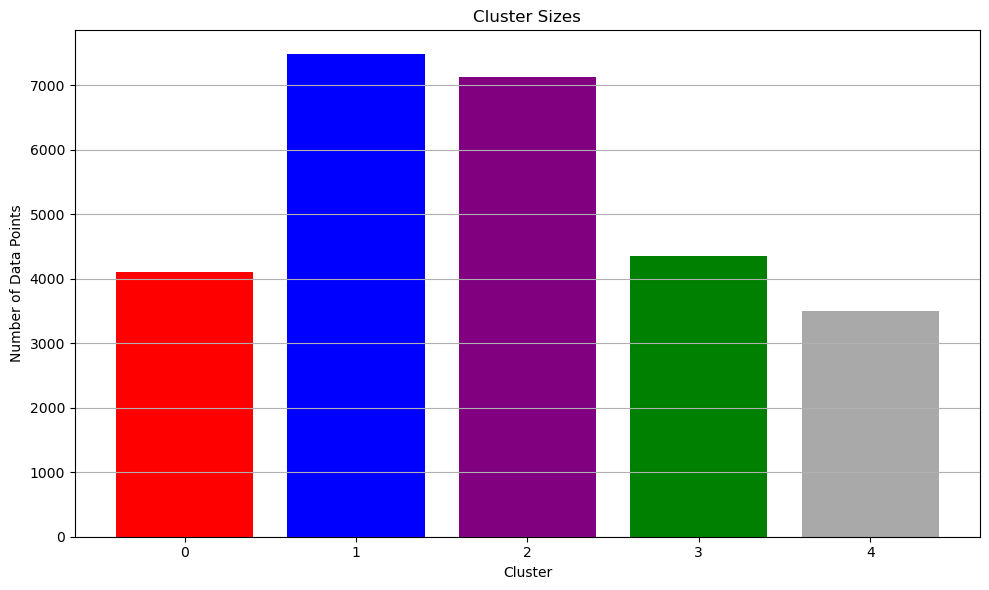

In [61]:
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'purple',
    3: 'green',
    4: 'darkgrey'
}

cluster_sizes = final_dataframe['Cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))


for cluster in range(len(cluster_sizes)):
    plt.bar(cluster, cluster_sizes[cluster], color=cluster_colors[cluster])


## Alternatively
# plt.bar(0, cluster_sizes[0], color=cluster_colors[0])
# plt.bar(1, cluster_sizes[1], color=cluster_colors[1])
# plt.bar(2, cluster_sizes[2], color=cluster_colors[2])
# plt.bar(3, cluster_sizes[3], color=cluster_colors[3])

plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(ticks=range(len(cluster_sizes)))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

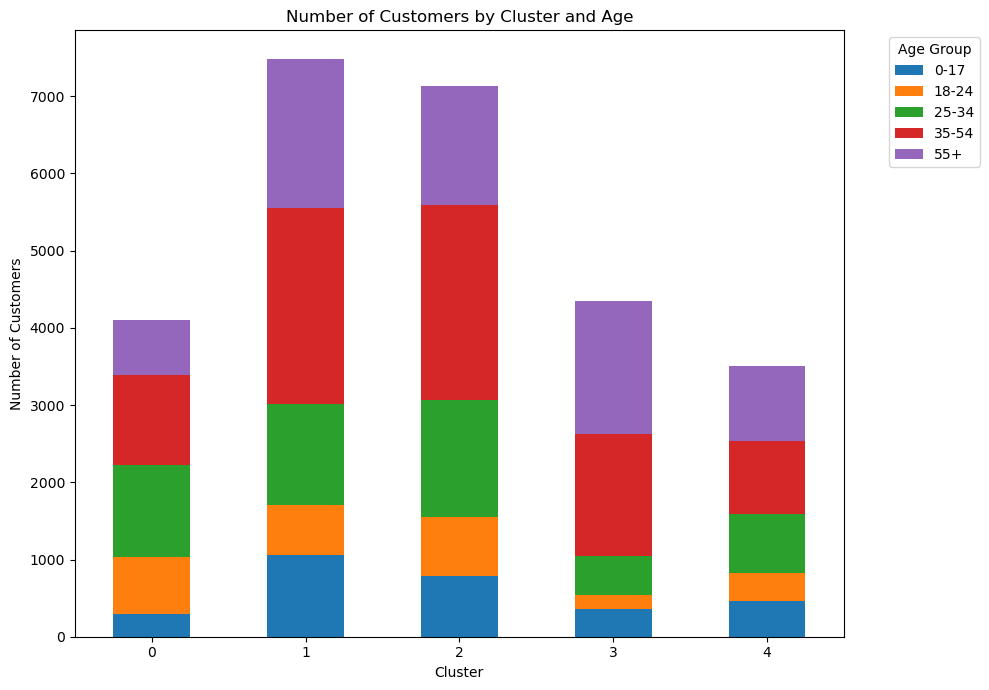

In [63]:
age_group = final_dataframe.groupby('Cluster')['age_group'].value_counts()

pivot_data = age_group.unstack().fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Number of Customers by Cluster and Age')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

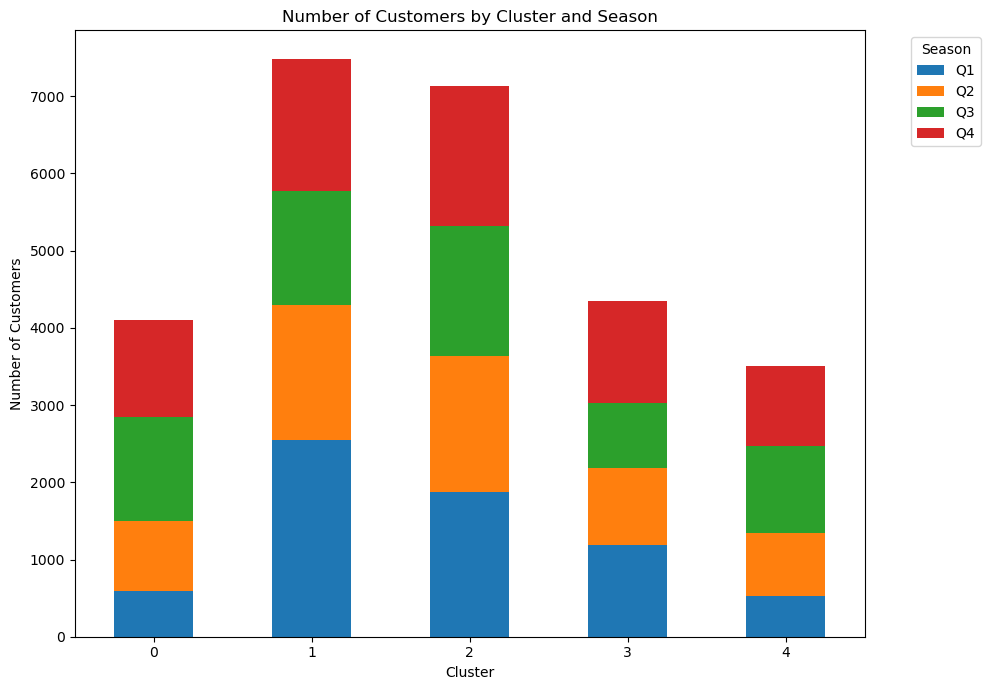

In [83]:
seasonality_purchases = final_dataframe.groupby('Cluster')['seasonality'].value_counts()

pivot_data = seasonality_purchases.unstack().fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Number of Customers by Cluster and Season')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()